In [42]:
import pickle
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [43]:
df_orig = pd.read_csv('df_out.csv')
df = df_orig
print(df.shape)
df.head()

(10000, 20)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


# 1 Data Preparation

## 1.1 Обработка пропусков

In [44]:
# Посчитаем кол-во пропусков в каждом признаке
df.isna().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year               36
manufacturer        0
model             128
fuel               63
odometer            0
title_status      166
transmission       45
image_url           2
description         2
state               0
lat                98
long               98
posting_date        2
price_category      0
date                2
dtype: int64

<AxesSubplot:>

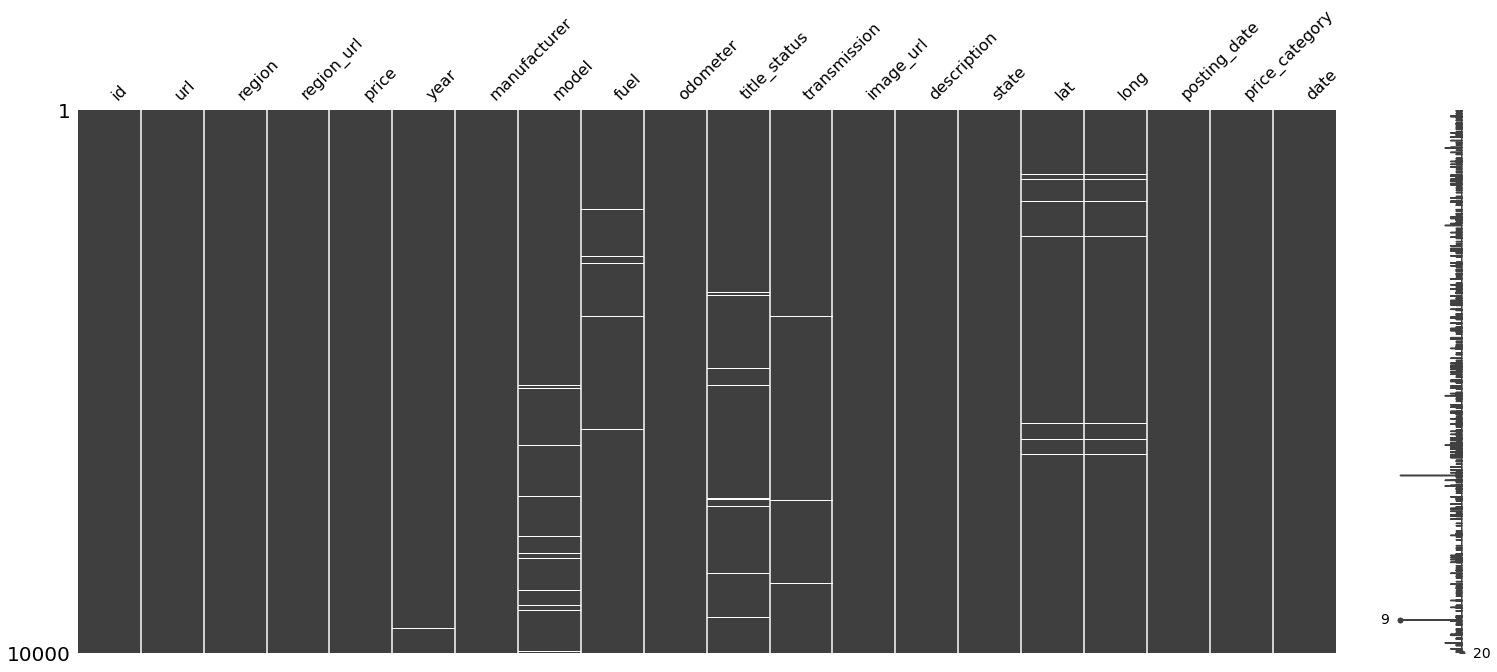

In [45]:
# Посмотрим на матрицу пропусков
msno.matrix(df)

In [46]:
# Посчитаем процент пропусков в каждом признаке
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values()
missing_values

id                0.00
state             0.00
price_category    0.00
manufacturer      0.00
odometer          0.00
region_url        0.00
region            0.00
url               0.00
price             0.00
image_url         0.02
description       0.02
posting_date      0.02
date              0.02
year              0.36
transmission      0.45
fuel              0.63
lat               0.98
long              0.98
model             1.28
title_status      1.66
dtype: float64

In [47]:
# Заполним пропуски в колонке year медианным значением
df.year = df.year.fillna(df.year.median())

In [48]:
# Заполним пропуски в колонке model значением other
df.model = df.model.fillna('other')

In [49]:
# Заполним пропуски в колонке fuel значением unknown
df.fuel = df.fuel.fillna('unknown')

In [50]:
# Заполним пропуски в колонке title_status самым популярным значением
df.title_status = df.title_status.fillna(df.title_status.value_counts().index[0])

In [51]:
# Заполним пропуски в колонке transmission значением other
df.transmission = df.transmission.fillna('other')

In [52]:
# Удалим строки с другими пропусками
df = df.dropna()

In [53]:
# Проверим данные
print(df.shape)
df.isna().sum()

(9902, 20)


id                0
url               0
region            0
region_url        0
price             0
year              0
manufacturer      0
model             0
fuel              0
odometer          0
title_status      0
transmission      0
image_url         0
description       0
state             0
lat               0
long              0
posting_date      0
price_category    0
date              0
dtype: int64

## 1.2 Преобразование типов

In [54]:
df.dtypes

id                  int64
url                object
region             object
region_url         object
price               int64
year              float64
manufacturer       object
model              object
fuel               object
odometer            int64
title_status       object
transmission       object
image_url          object
description        object
state              object
lat               float64
long              float64
posting_date       object
price_category     object
date               object
dtype: object

In [55]:
# Преобразуем колонку year в тип int
df.year = df.year.astype(int)

C:\Users\ilapr\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [56]:
# преобразуем колонку date в тип datetime
df.date = pd.to_datetime(df.date, utc=True)

In [57]:
# преобразован колонку posting_date в тип datetime
df.posting_date = pd.to_datetime(df.posting_date, utc=True)

In [58]:
df.dtypes

id                              int64
url                            object
region                         object
region_url                     object
price                           int64
year                            int32
manufacturer                   object
model                          object
fuel                           object
odometer                        int64
title_status                   object
transmission                   object
image_url                      object
description                    object
state                          object
lat                           float64
long                          float64
posting_date      datetime64[ns, UTC]
price_category                 object
date              datetime64[ns, UTC]
dtype: object

## 1.3 Обработка выбросов

In [59]:
df.describe().apply(lambda x: round(x, 2))

,id,price,year,odometer,lat,long
count,9.902000e+03,9902.00,9902.00,9902.00,9902.00,9902.00
mean,7.311556e+09,20684.20,2010.92,93380.18,38.59,-94.17
std,4.361977e+06,125234.37,9.69,63322.53,5.84,18.13
min,7.301586e+09,500.00,1915.00,0.00,-67.14,-158.07
25%,7.308184e+09,7880.00,2008.00,39003.25,34.83,-110.32
50%,7.312775e+09,15592.50,2013.00,89000.00,39.30,-88.00
75%,7.315285e+09,27990.00,2017.00,137000.00,42.43,-80.83
max,7.317090e+09,12345678.00,2022.00,283466.00,64.95,173.89


In [60]:
# Создадим функцию для определения границы выбросов
# в нормально распределенной выборке
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (
        q25 - 1.5 * iqr,
        q75 + 1.5 * iqr
    )
    return boundaries

### 1.3.1 Обработка выбросов широты

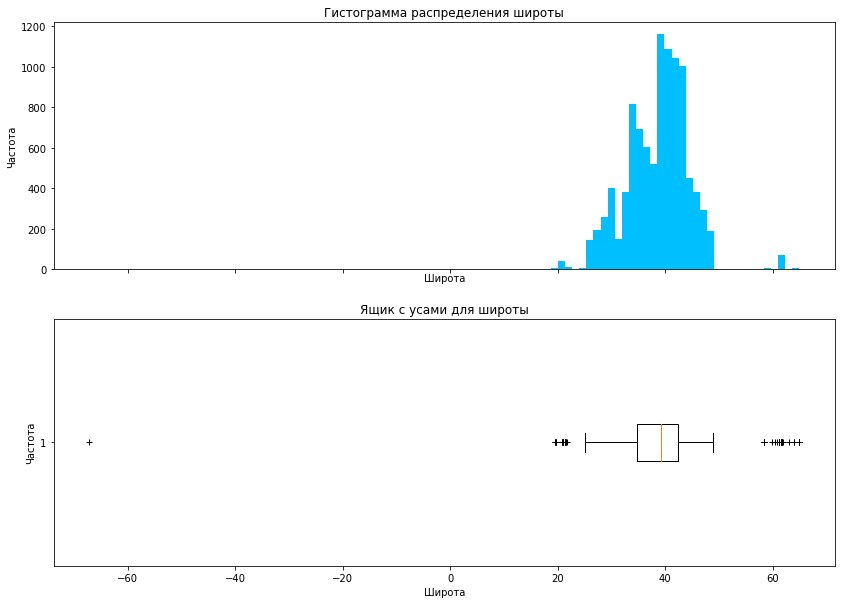

In [61]:
# Построим гистограмму распределения и ящик с усами для широты
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

ax1.hist(df.lat, bins=100, color='deepskyblue')
ax1.set_title('Гистограмма распределения широты')
ax1.set_xlabel('Широта')
ax1.set_ylabel('Частота')

ax2.boxplot(df.lat, sym='+', vert=False)
ax2.set_xlabel('Широта')
ax2.set_ylabel('Частота')
ax2.set_title('Ящик с усами для широты');

In [62]:
# Определим границы нормальных значений
lat_outl_boundaries = calculate_outliers(df.lat)
print('Границы нормальных значений:', lat_outl_boundaries)

Границы нормальных значений: (23.433815625, 53.824622624999996)


In [63]:
# Вычислим булеву маску выбросов
lat_outliers_bool = (df.lat <= lat_outl_boundaries[0]) | (df.lat >= lat_outl_boundaries[1])
print(f'Кол-во выбросов: {lat_outliers_bool.sum()}')

Кол-во выбросов: 143


In [64]:
# Удалим выбросы
df = df[~lat_outliers_bool]
df.shape

(9759, 20)

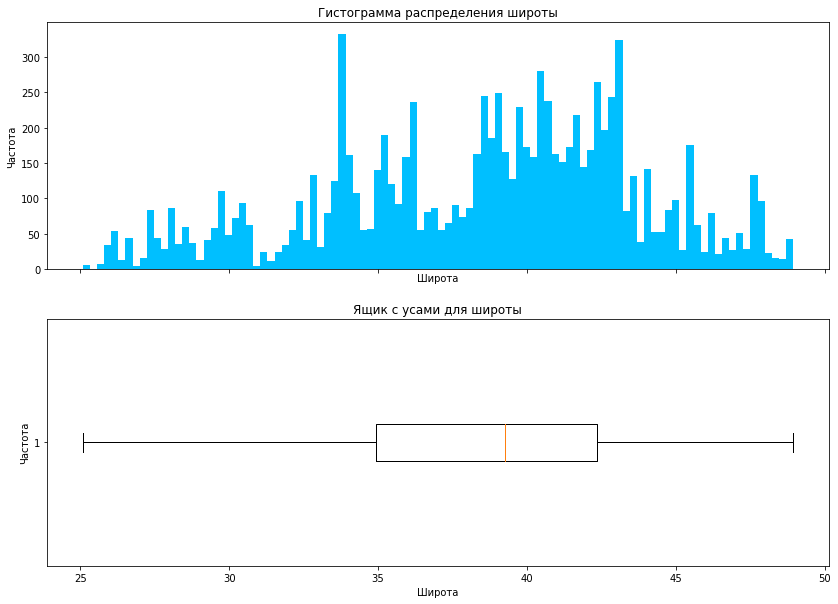

In [65]:
# Проверим выбросы на графиках
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

ax1.hist(df.lat, bins=100, color='deepskyblue')
ax1.set_title('Гистограмма распределения широты')
ax1.set_xlabel('Широта')
ax1.set_ylabel('Частота')

ax2.boxplot(df.lat, sym='+', vert=False)
ax2.set_xlabel('Широта')
ax2.set_ylabel('Частота')
ax2.set_title('Ящик с усами для широты');

### 1.3.2 Обработка выбросов долготы

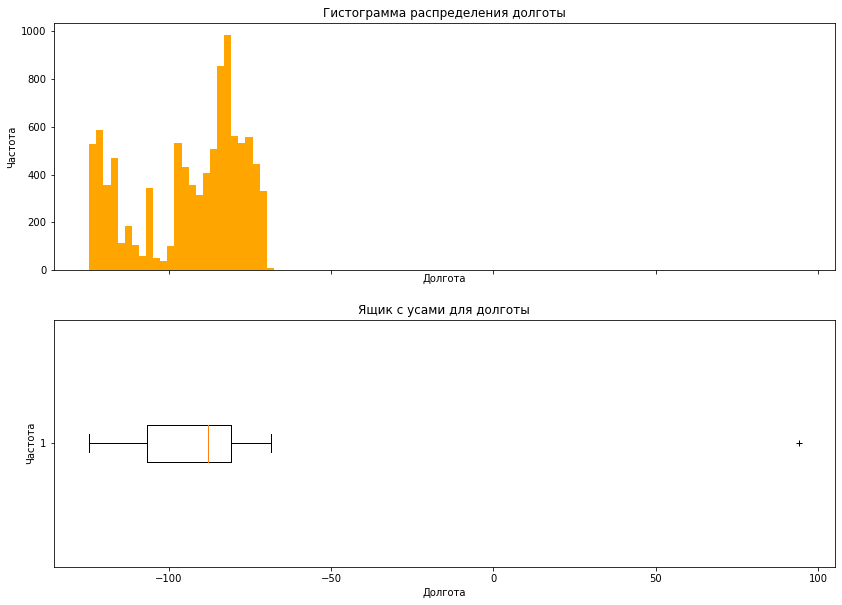

In [66]:
# Построим гистограмму распределения и ящик с усами для долготы
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

ax1.hist(df.long, bins=100, color='orange')
ax1.set_title('Гистограмма распределения долготы')
ax1.set_xlabel('Долгота')
ax1.set_ylabel('Частота')

ax2.boxplot(df.long, sym='+', vert=False)
ax2.set_xlabel('Долгота')
ax2.set_ylabel('Частота')
ax2.set_title('Ящик с усами для долготы');

In [67]:
# Определим границы нормальных значений
long_outl_boundaries = calculate_outliers(df.long)
print('Границы нормальных значений:', long_outl_boundaries)

Границы нормальных значений: (-145.468434, -41.87261000000001)


In [68]:
# Построим булеву маску выбросов
long_outliers_bool = (df.long <= long_outl_boundaries[0]) | (df.long >= long_outl_boundaries[1])
print(f'Кол-во выбросов: {long_outliers_bool.sum()}')

Кол-во выбросов: 1


In [69]:
# Удалим выбросы
df = df[~long_outliers_bool]
df.shape

(9758, 20)

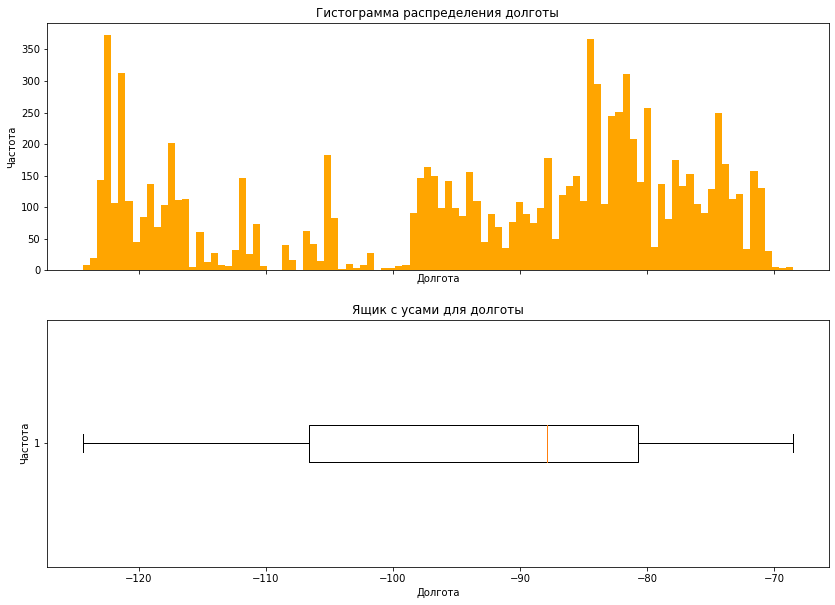

In [70]:
# Проверим выбросы на графиках
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

ax1.hist(df.long, bins=100, color='orange')
ax1.set_title('Гистограмма распределения долготы')
ax1.set_xlabel('Долгота')
ax1.set_ylabel('Частота')

ax2.boxplot(df.long, sym='+', vert=False)
ax2.set_xlabel('Долгота')
ax2.set_ylabel('Частота')
ax2.set_title('Ящик с усами для долготы');

### 1.3.3 Обработка выбросов стоимости автомобиля

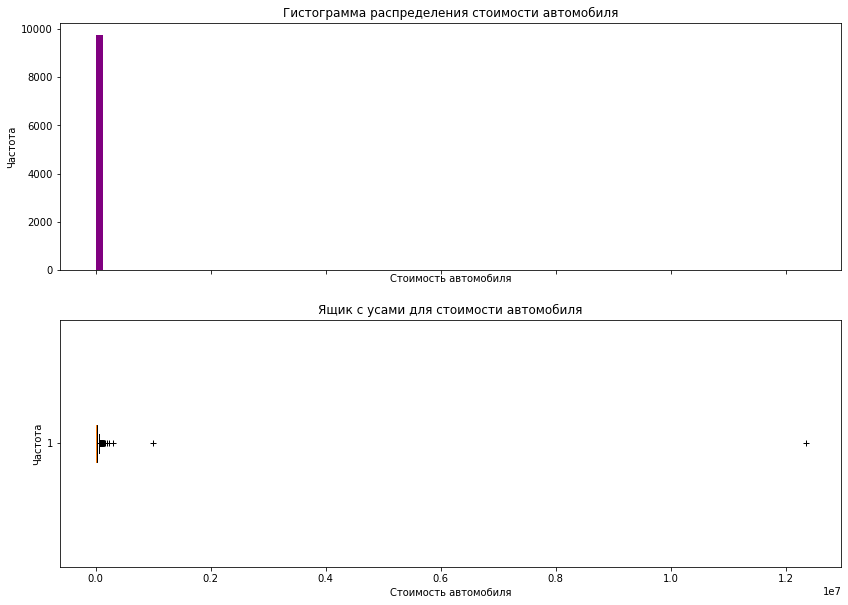

In [71]:
# Построим гистограмму распределения и ящик с усами для стоимости автомобиля
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

ax1.hist(df.price, bins=100, color='purple')
ax1.set_title('Гистограмма распределения стоимости автомобиля')
ax1.set_xlabel('Стоимость автомобиля')
ax1.set_ylabel('Частота')

ax2.boxplot(df.price, sym='+', vert=False)
ax2.set_xlabel('Стоимость автомобиля')
ax2.set_ylabel('Частота')
ax2.set_title('Ящик с усами для стоимости автомобиля');

In [72]:
# Определим границы нормальных значений
price_outl_boundaries = calculate_outliers(df.price)
print('Границы нормальных значений:', price_outl_boundaries)

Границы нормальных значений: (-22485.0, 58275.0)


In [73]:
# Построим булеву маску выбросов
price_outliers_bool = (df.price <= price_outl_boundaries[0]) | (df.price >= price_outl_boundaries[1])
print(f'Кол-во выбросов: {price_outliers_bool.sum()}')

Кол-во выбросов: 211


In [74]:
# Удалим выбросы
df = df[~price_outliers_bool]
df.shape

(9547, 20)

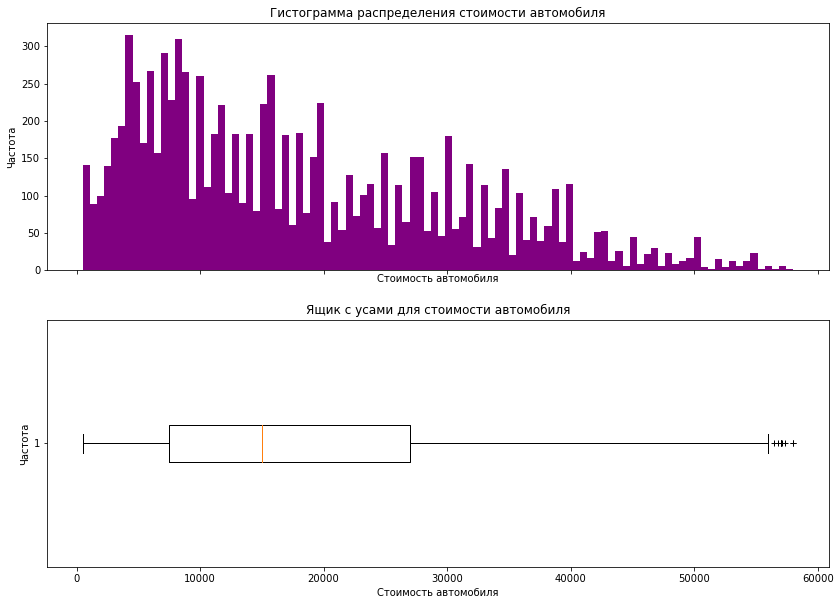

In [75]:
# Проверим выбросы на графиках
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

ax1.hist(df.price, bins=100, color='purple')
ax1.set_title('Гистограмма распределения стоимости автомобиля')
ax1.set_xlabel('Стоимость автомобиля')
ax1.set_ylabel('Частота')

ax2.boxplot(df.price, sym='+', vert=False)
ax2.set_xlabel('Стоимость автомобиля')
ax2.set_ylabel('Частота')
ax2.set_title('Ящик с усами для стоимости автомобиля');

### 1.3.4 Обработка выбросов количества пройденных миль

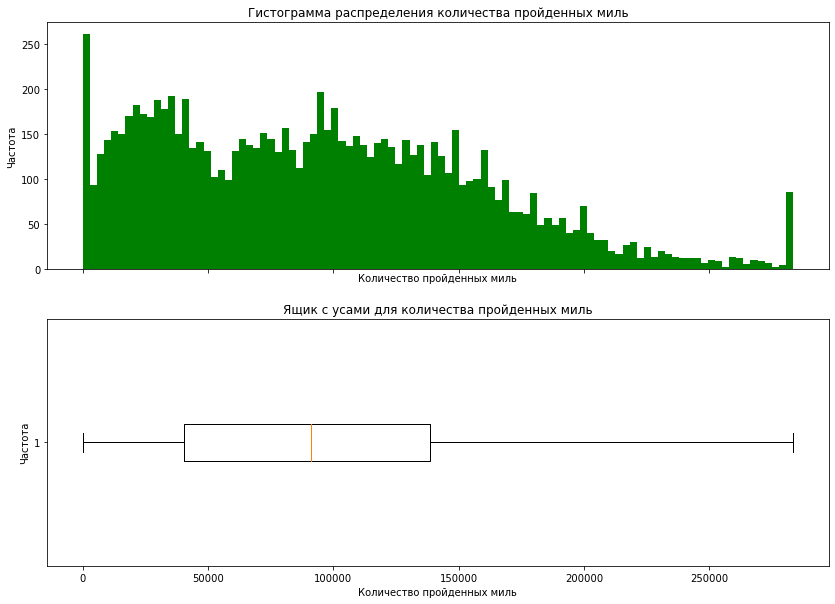

In [76]:
# построить гистограмму распределения и ящик с усами для количества пройденных миль
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

ax1.hist(df.odometer, bins=100, color='green')
ax1.set_title('Гистограмма распределения количества пройденных миль')
ax1.set_xlabel('Количество пройденных миль')
ax1.set_ylabel('Частота')

ax2.boxplot(df.odometer, sym='+', vert=False)
ax2.set_xlabel('Количество пройденных миль')
ax2.set_ylabel('Частота')
ax2.set_title('Ящик с усами для количества пройденных миль');

Выбросов не наблюдается

### 1.3.5 Обработка выбросов лет выпусков

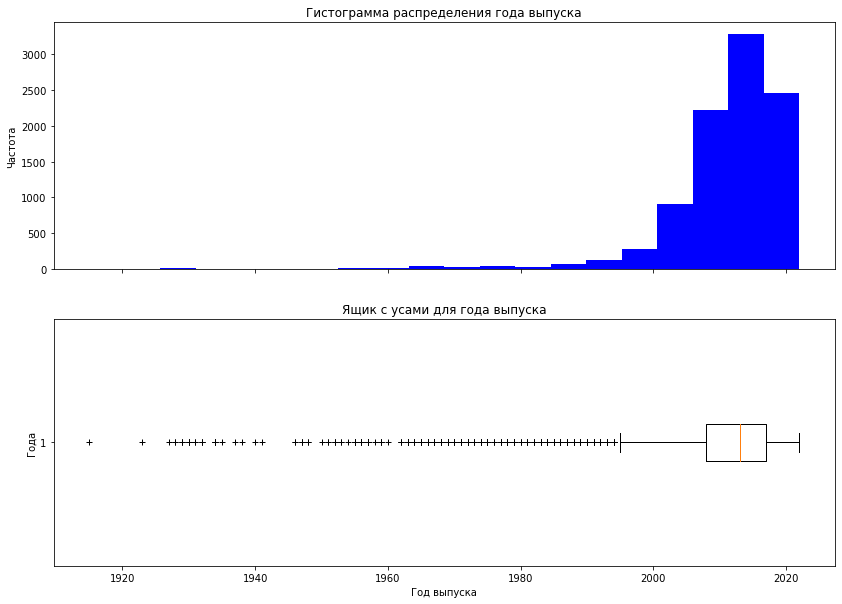

In [77]:
# построить гистограмму распределения и ящик с усами для года выпуска
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

ax1.hist(df.year, bins=20, color='blue')
ax1.set_title('Гистограмма распределения года выпуска')
ax2.set_xlabel('Год выпуска')
ax1.set_ylabel('Частота')

ax2.boxplot(df.year, sym='+', vert=False)
ax2.set_xlabel('Год выпуска')
ax2.set_ylabel('Года')
ax2.set_title('Ящик с усами для года выпуска');

In [78]:
# Определим границы нормальных значений
year_outl_boundaries = calculate_outliers(df.year)
print('Границы нормальных значений:', year_outl_boundaries)

Границы нормальных значений: (1994.5, 2030.5)


In [79]:
# Построим булевы маску выбросов
year_outliers_bool = (df.year <= year_outl_boundaries[0]) | (df.year >= year_outl_boundaries[1])
print(f'Кол-во выбросов: {year_outliers_bool.sum()}')

Кол-во выбросов: 379


In [80]:
# Удалим выбросы
df = df[~year_outliers_bool]
df.shape

(9168, 20)

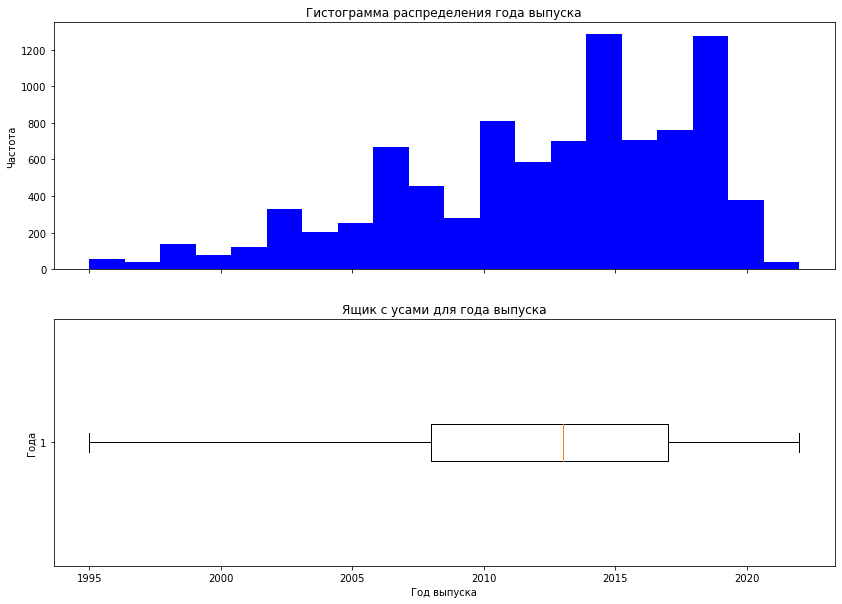

In [81]:
# Проверим выбросы на графиках
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

ax1.hist(df.year, bins=20, color='blue')
ax1.set_title('Гистограмма распределения года выпуска')
ax2.set_xlabel('Год выпуска')
ax1.set_ylabel('Частота')

ax2.boxplot(df.year, sym='+', vert=False)
ax2.set_xlabel('Год выпуска')
ax2.set_ylabel('Года')
ax2.set_title('Ящик с усами для года выпуска');

# 2 Feature engineering
## 2.2 Преобразование количественных переменных в категориальные

In [82]:
# Создадим новый категориальный признак age_category.
# Автомобили выпущенные до 2006 года - категория old
# Автомобили выпущенные с 2006 по 2013 год - категория average
# Автомобили выпущенные после 2013 - категория new
df['age_category'] = df.year.apply(
    lambda x: str('old' if x < 2006 else ('new' if x > 2013 else 'average'))
)

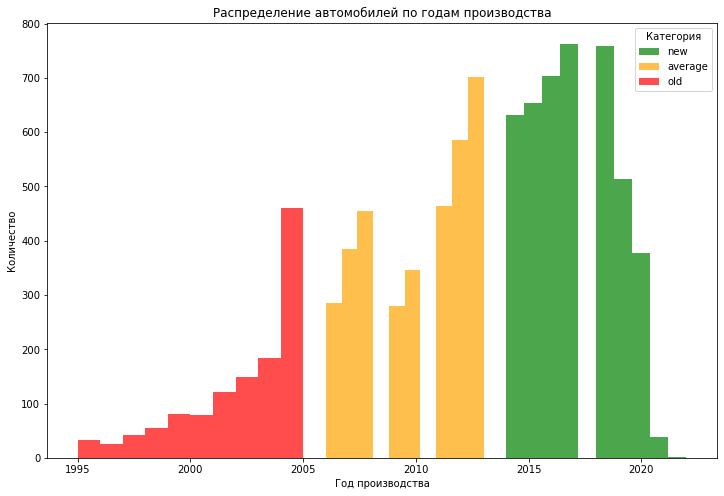

In [83]:
# построим гистограмму распределения автомобилей по годам производства и категориям
colors = {'new': 'green', 'average': 'orange', 'old': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))
for age_category, color in colors.items():
    data = df[df['age_category'] == age_category]
    ax.hist(data['year'], color=color, alpha=0.7)

plt.ylabel('Количество')
plt.xlabel('Год производства')
plt.title('Распределение автомобилей по годам производства')
plt.legend(colors, title="Категория");

## 2.3 Построение признаков из строк
### 2.3.1 Создание количественных переменных

In [84]:
# Построим признак длины названия модели в символах
df['model_len'] = df.model.str.len()
df.model_len.describe()

count    9168.000000
mean       12.056610
std         8.711537
min         1.000000
25%         6.000000
50%         9.000000
75%        18.000000
max       187.000000
Name: model_len, dtype: float64

In [85]:
# Построим признак длины названия модели в словах
df['model_word_count'] = df.model.apply(lambda x: len(x.split(' ')))
df.model_word_count.describe()

count    9168.000000
mean        2.196553
std         1.493589
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        29.000000
Name: model_word_count, dtype: float64

In [86]:
# Построим признак длины описания в символах
df['description_len'] = df.model.str.len()
df.description_len.describe()

count    9168.000000
mean       12.056610
std         8.711537
min         1.000000
25%         6.000000
50%         9.000000
75%        18.000000
max       187.000000
Name: description_len, dtype: float64

In [87]:
# Построим признак длины описания в словах
df['description_word_count'] = df.model.apply(lambda x: len(x.split(' ')))
df.description_word_count.describe()

count    9168.000000
mean        2.196553
std         1.493589
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        29.000000
Name: description_word_count, dtype: float64

### 2.3.2 Создание строковых переменных

In [88]:
# Построим признак короткого название модели из признака model
df['short_model'] = df.model.apply(lambda x: x.split(' ')[0])
df.short_model.nunique()

830

In [89]:
# Построим признак названия региона на основе ссылки региона
df['region_new'] = df.region_url.apply(
    lambda x: x.lower().split('://')[1].split('.')[0]
)
df['region_new'].nunique()

399

In [90]:
df['region'].nunique()

387

In [91]:
# Посмотрим сколько не равных элементов в признаках region и region_new
df[df['region'] != df['region_new']].region.unique().size

230

In [92]:
# Посмотрим на различающиеся значения
df[df['region'] != df['region_new']].region.unique()

array(['north jersey', 'reno / tahoe', 'new york city', 'des moines',
       'grand rapids', 'omaha / council bluffs', 'rhode island',
       'fresno / madera', 'inland empire', 'south jersey', 'new haven',
       'ft myers / SW florida', 'tyler / east TX', 'corpus christi',
       'appleton-oshkosh-FDL', 'las vegas', 'greenville / upstate',
       'port huron', 'olympic peninsula', 'san angelo',
       'dallas / fort worth', 'SF bay area', 'fort collins / north CO',
       'st cloud', 'colorado springs', 'yuba-sutter', 'san luis obispo',
       'ventura county', 'baton rouge', 'central NJ',
       'killeen / temple / ft hood', 'jersey shore',
       'kennewick-pasco-richland', 'western KY', 'detroit metro',
       'battle creek', 'st louis, MO', 'dayton / springfield',
       'kansas city, MO', 'orange county', 'champaign urbana', 'show low',
       'sarasota-bradenton', 'tampa bay area', 'raleigh / durham / CH',
       'seattle-tacoma', 'gold country', 'fargo / moorhead',
       'sou

In [93]:
# Удалим символы, которые усиливают расхождение
df['region_corrected'] = df['region'].apply(
    lambda x: x.lower().split('/')[0].replace(' ', '').replace('-', '')
)

In [94]:
df['region_corrected'].nunique()

384

In [95]:
df[df['region_corrected'] != df['region_new']].region.unique().size

115

## 2.4 Построение признаков из количественных переменных

In [96]:
df.dtypes

id                                      int64
url                                    object
region                                 object
region_url                             object
price                                   int64
year                                    int32
manufacturer                           object
model                                  object
fuel                                   object
odometer                                int64
title_status                           object
transmission                           object
image_url                              object
description                            object
state                                  object
lat                                   float64
long                                  float64
posting_date              datetime64[ns, UTC]
price_category                         object
date                      datetime64[ns, UTC]
age_category                           object
model_len                         

### 2.4.1 Создание одних количественных признаков на основе других

In [97]:
# Построим признак отношения пробега к цене
df['odometer/price'] = df.apply(lambda x: x.odometer / x.price, axis=1)
df['odometer/price'].describe()

count    9168.000000
mean       14.750016
std        27.774603
min         0.000000
25%         1.637451
50%         5.860024
75%        16.389936
max       466.666667
Name: odometer/price, dtype: float64

### 2.4.2 Стандартизация переменных

In [98]:
df.dtypes

id                                      int64
url                                    object
region                                 object
region_url                             object
price                                   int64
year                                    int32
manufacturer                           object
model                                  object
fuel                                   object
odometer                                int64
title_status                           object
transmission                           object
image_url                              object
description                            object
state                                  object
lat                                   float64
long                                  float64
posting_date              datetime64[ns, UTC]
price_category                         object
date                      datetime64[ns, UTC]
age_category                           object
model_len                         

In [99]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,date,age_category,model_len,model_word_count,description_len,description_word_count,short_model,region_new,region_corrected,odometer/price
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,2021-04-17 16:30:50+00:00,new,22,5,22,5,2500,chattanooga,chattanooga,0.499036
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,unknown,60023,...,2021-05-03 19:40:21+00:00,new,20,4,20,4,explorer,newjersey,northjersey,3.542852
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,2021-04-28 10:52:20+00:00,new,16,3,16,3,golf,reno,reno,0.394718
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,2021-04-17 14:08:57+00:00,average,4,1,4,1,rav4,fayetteville,fayetteville,8.089034
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,...,2021-05-03 22:32:06+00:00,new,6,1,6,1,altima,newyork,newyorkcity,0.366972


In [100]:
# Определим какие признаки нужно стандартизировать
std_targets = [
    'year',
    'odometer',
    'lat',
    'long',
    'model_len',
    'model_word_count',
    'description_len',
    'description_word_count',
    'odometer/price'
]

In [101]:
# Проведем стандартизацию признаков
std_scaler = StandardScaler()
std_scaler.fit(df[std_targets])

StandardScaler()

In [102]:
print('Среднее:', std_scaler.mean_)
print('Дисперсия', std_scaler.var_)

Среднее: [ 2.01226571e+03  9.57252384e+04  3.84786466e+01 -9.30088642e+01
  1.20566099e+01  2.19655323e+00  1.20566099e+01  2.19655323e+00
  1.47500160e+01]
Дисперсия [3.06462411e+01 3.95371657e+09 2.68255401e+01 2.68406399e+02
 7.58825937e+01 2.23056404e+00 7.58825937e+01 2.23056404e+00
 7.71344440e+02]


In [103]:
# Сохраним стандартизированные признаки
std_scaled = std_scaler.transform(df[std_targets])
df[[f'{name}_std' for name in std_targets]] = std_scaled
df[[f'{name}_std' for name in std_targets]].head()

,year_std,odometer_std,lat_std,long_std,model_len_std,model_word_count_std,description_len_std,description_word_count_std,odometer/price_std
0,1.397115,-1.085954,-0.660055,0.473589,1.141467,1.877089,1.141467,1.877089,-0.513122
1,0.674559,-0.567796,0.452405,1.156490,0.911874,1.207525,0.911874,1.207525,-0.403526
2,0.855198,-1.298967,-0.907342,0.524751,0.452688,0.537960,0.452688,0.537960,-0.516878
3,0.132642,0.342975,-0.533407,0.876119,-0.924871,-0.801170,-0.924871,-0.801170,-0.239836
4,1.577754,-1.395153,0.420161,1.184095,-0.695278,-0.801170,-0.695278,-0.801170,-0.517877


In [104]:
# Выведем описательную статистику стандартизированных признаков
df[[f'{name}_std' for name in std_targets]].describe().apply(lambda x: round(x, 3))

,year_std,odometer_std,lat_std,long_std,model_len_std,model_word_count_std,description_len_std,description_word_count_std,odometer/price_std
count,9168.000,9168.000,9168.000,9168.000,9168.000,9168.000,9168.000,9168.000,9168.000
mean,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-3.119,-1.522,-2.587,-1.908,-1.269,-0.801,-1.269,-0.801,-0.531
25%,-0.771,-0.871,-0.681,-0.746,-0.695,-0.801,-0.695,-0.801,-0.472
50%,0.133,-0.057,0.151,0.341,-0.351,-0.132,-0.351,-0.132,-0.320
75%,0.855,0.691,0.741,0.757,0.682,0.538,0.682,0.538,0.059
max,1.758,2.986,2.019,1.496,20.083,17.947,20.083,17.947,16.272


## 2.5 Построение признаков на основе дат
### 2.5.1 Построение признаков

In [105]:
df.dtypes

id                                          int64
url                                        object
region                                     object
region_url                                 object
price                                       int64
year                                        int32
manufacturer                               object
model                                      object
fuel                                       object
odometer                                    int64
title_status                               object
transmission                               object
image_url                                  object
description                                object
state                                      object
lat                                       float64
long                                      float64
posting_date                  datetime64[ns, UTC]
price_category                             object
date                          datetime64[ns, UTC]


In [106]:
df.posting_date.head()

0   2021-04-17 16:30:50+00:00
1   2021-05-03 19:40:21+00:00
2   2021-04-28 10:52:20+00:00
3   2021-04-17 14:08:57+00:00
4   2021-05-03 22:32:06+00:00
Name: posting_date, dtype: datetime64[ns, UTC]

In [107]:
df.date.head()

0   2021-04-17 16:30:50+00:00
1   2021-05-03 19:40:21+00:00
2   2021-04-28 10:52:20+00:00
3   2021-04-17 14:08:57+00:00
4   2021-05-03 22:32:06+00:00
Name: date, dtype: datetime64[ns, UTC]

In [108]:
# Определим равенство признаков date и хостинг posting_date
(df.date == df.posting_date).mean()

1.0

In [109]:
# Удалим один из них (date)
df = df.drop('date', axis=1)

In [110]:
# Создадим признак месяца публикации объявления
df['posting_month'] = df.posting_date.dt.month

In [111]:
# Создадим признак дня недели публикации объявления
df['dayofweek'] = df.posting_date.dt.weekday

In [112]:
# Создадим признак возраста автомобиля
df['diff_years'] = df.posting_date.dt.year - df.year

In [113]:
# Проверим созданные признаки
df[['posting_month', 'dayofweek', 'diff_years']].head()

,posting_month,dayofweek,diff_years
0,4,5,1
1,5,0,5
2,4,2,4
3,4,5,8
4,5,0,0


### 2.5.2 Стандартизация признаков

In [114]:
# Стандартизируем созданные признаки
new_features = ['posting_month', 'dayofweek', 'diff_years']
std_scaler = StandardScaler()
std_scaler.fit(df[new_features])
std_scaled = std_scaler.transform(df[new_features])
df[[f'std_{feature}' for feature in new_features]] = std_scaled
df[[f'std_{feature}' for feature in new_features]].head()

,std_posting_month,std_dayofweek,std_diff_years
0,-0.611133,1.124779,-1.397115
1,1.636306,-1.378127,-0.674559
2,-0.611133,-0.376965,-0.855198
3,-0.611133,1.124779,-0.132642
4,1.636306,-1.378127,-1.577754


## 2.1 Преобразование категориальных переменных

In [115]:
df.nunique()

id                            9168
url                           9168
region                         387
region_url                     399
price                         2018
year                            28
manufacturer                    39
model                         3129
fuel                             6
odometer                      6478
title_status                     6
transmission                     3
image_url                     8284
description                   9030
state                           50
lat                           4623
long                          4652
posting_date                  9094
price_category                   3
age_category                     3
model_len                       64
model_word_count                21
description_len                 64
description_word_count          21
short_model                    830
region_new                     399
region_corrected               384
odometer/price                8217
year_std            

In [116]:
# Определим категориальные переменные
categorical_list = [
    'price_category',
    'short_model',
    'transmission',
    'region',
    'manufacturer',
    'state',
    'title_status',
    'fuel',
    'title_status',
    'age_category'
]

In [117]:
# Сделаем one-hot кодирование категориальных переменных
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[categorical_list])

OneHotEncoder(sparse=False)

In [118]:
ohe_transformed = ohe.transform(df[categorical_list])
ohe_transformed

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [119]:
ohe.categories_

[array(['high', 'low', 'medium'], dtype=object),
 array(['-benz', '1', '124', '128i', '135i', '1500', '163869', '198.5',
        '1999', '2', '200', '2000', '2002', '2006', '2007', '2008', '2009',
        '2012', '2015', '2016', '2017', '2018', '2021', '2500', '2500hd',
        '3', '3-series', '3.2', '300', '300-series', '300c', '300s',
        '320i', '323i', '325ci', '325i', '325xi', '328', '328ci', '328d',
        '328i', '328xi', '330i', '330xi', '335i', '335xi', '350', '3500',
        '3500hd', '350z', '370z', '3i', '4', '4-runner', '428', '430i',
        '435i', '440xi', '4500', '4runner', '4x4', '5', '5-series', '500',
        '500c', '500l', '500x', '525i', '528i', '528xi', '530', '530i',
        '535i', '535xi', '540i', '545i', '5500', '5500hd', '550i', '6',
        '640', '645ci', '650i', '650xi', '7', '750', '750i', '750xi', '86',
        '911', 'ACURA*', 'ALL', 'Acuarea', 'BUY', 'Blue', 'Buicks', 'By',
        'C', 'CHEVORLET', 'CLICK', 'CR-V', 'CX-5', 'Cemetery', 'Champio

In [120]:
categorical_feature_names = ohe.get_feature_names()
categorical_feature_names

array(['x0_high', 'x0_low', 'x0_medium', ..., 'x9_average', 'x9_new',
       'x9_old'], dtype=object)

In [121]:
# Сохраним преобразованные категориальные переменные
df[categorical_feature_names] = ohe_transformed

C:\Users\ilapr\anaconda3\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


## 2.6 Удаление не информативных колонок

In [122]:
# Выведем типы всех переменных кроме закодированных категориальных
df.dtypes.drop(categorical_feature_names)

id                                          int64
url                                        object
region                                     object
region_url                                 object
price                                       int64
year                                        int32
manufacturer                               object
model                                      object
fuel                                       object
odometer                                    int64
title_status                               object
transmission                               object
image_url                                  object
description                                object
state                                      object
lat                                       float64
long                                      float64
posting_date                  datetime64[ns, UTC]
price_category                             object
age_category                               object


In [123]:
# Проверим количество уникальных переменных в каждом из них
df.drop(categorical_feature_names, axis=1).nunique()

id                            9168
url                           9168
region                         387
region_url                     399
price                         2018
year                            28
manufacturer                    39
model                         3129
fuel                             6
odometer                      6478
title_status                     6
transmission                     3
image_url                     8284
description                   9030
state                           50
lat                           4623
long                          4652
posting_date                  9094
price_category                   3
age_category                     3
model_len                       64
model_word_count                21
description_len                 64
description_word_count          21
short_model                    830
region_new                     399
region_corrected               384
odometer/price                8217
year_std            

In [124]:
# Удалим ненужные признаки

columns_for_drop = [
    # Переработанные строки
    'url', 'region', 'region_url', 'image_url', 'description',
    'state',
    # Стандартизированные
    'year', 'odometer', 'lat', 'long', 'odometer/price', 'posting_month',
    'model_len', 'model_word_count', 'description_len', 'description_word_count',
    # Переработанные из строк в число
    'model', 'description',
    # Переработанные из даты в число
    'posting_date',
    # Другие
    'manufacturer', 'age_category', 'region_new',
    'region_corrected',
    'dayofweek', 'diff_years'
]

columns_for_drop.extend(categorical_list)
columns_for_drop.remove('price_category')

In [125]:
df = df.drop(columns_for_drop, axis=1)

In [126]:
df.drop(categorical_feature_names, axis=1).dtypes

id                              int64
price                           int64
price_category                 object
year_std                      float64
odometer_std                  float64
lat_std                       float64
long_std                      float64
model_len_std                 float64
model_word_count_std          float64
description_len_std           float64
description_word_count_std    float64
odometer/price_std            float64
std_posting_month             float64
std_dayofweek                 float64
std_diff_years                float64
dtype: object

In [127]:
df.shape

(9168, 1348)

In [128]:
# Сохраним датафрейм
df.to_csv('data/df_out_for_modelling.csv')

# 3 Modelling
## 3.1 Подготовка данных

In [129]:
df = pd.read_csv('data/df_out_for_modelling.csv')
df.head()

,Unnamed: 0,id,price,price_category,year_std,odometer_std,lat_std,long_std,model_len_std,model_word_count_std,...,x7_unknown,x8_clean,x8_lien,x8_missing,x8_parts only,x8_rebuilt,x8_salvage,x9_average,x9_new,x9_old
0,0,7308295377,54990,high,1.397115,-1.085954,-0.660055,0.473589,1.141467,1.877089,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,7316380095,16942,medium,0.674559,-0.567796,0.452405,1.156490,0.911874,1.207525,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,7313733749,35590,high,0.855198,-1.298967,-0.907342,0.524751,0.452688,0.537960,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,7308210929,14500,medium,0.132642,0.342975,-0.533407,0.876119,-0.924871,-0.801170,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,7316474668,21800,medium,1.577754,-1.395153,0.420161,1.184095,-0.695278,-0.801170,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [130]:
df.shape

(9168, 1349)

In [131]:
# Jтелем от данных целевую переменную
x_vars = list(df.columns)
x_vars.remove('price_category')

x = df[x_vars]
y = df['price_category']

In [132]:
# Разделим данные на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

## 3.2 Проверка модели логистической регрессии

In [133]:
# Инициализируем модель логистической регрессии
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [134]:
# Проверим модель на тестовых данных
y_prediction = logreg.predict(x_test)
accuracy_score(y_test, y_prediction)

0.3456924754634678

In [135]:
# Проверим модель с помощью кросс-валидации
cv_score = cross_val_score(logreg, x, y, cv=5)

In [136]:
cv_score.mean(), round(cv_score.std(), 4)

(0.3403141604213555, 0.0001)

## 3.3 Проверка модели случайного леса

In [137]:
# Инициализируем модель случайного леса
rforest = RandomForestClassifier(random_state=42)
rforest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [138]:
# Проверим модель на тестовых данных
y_prediction = rforest.predict(x_test)
accuracy_score(y_test, y_prediction)

1.0

In [139]:
# Проверим модель с помощью кросс-валидации
cv_score = cross_val_score(rforest, x, y, cv=5)

In [140]:
cv_score.mean(), cv_score.std()

(1.0, 0.0)

## 3.4 Проверка модели многослойного персептрона

In [141]:
# Инициализируем модель многослойного персептрона
mlpc = MLPClassifier(random_state=42)
mlpc.fit(x_train, y_train)

MLPClassifier(random_state=42)

In [142]:
# Проверим модель на тестовых данных
y_prediction = mlpc.predict(x_test)
accuracy_score(y_test, y_prediction)

0.3227917121046892

In [143]:
# Проверим модель с помощью кросс-валидации
cv_score = cross_val_score(mlpc, x, y, cv=5)

In [144]:
cv_score.mean(), cv_score.std()

(0.33267819290232803, 0.004182914376946644)

# 4 Results

Большая точность у модели случайного леса и составляет 100% на тестовых данных

In [145]:
# Обучим модель случайного леса на всех данных
final_rforest = RandomForestClassifier(random_state=42)
final_rforest.fit(x, y)

RandomForestClassifier(random_state=42)

In [147]:
# Сохраним модель с помощью pickle
with open('model.pickle', 'wb') as file:
    pickle.dump(final_rforest, file)